<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity2023/blob/main/0902_hex_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
import graphviz
import random
from itertools import cycle

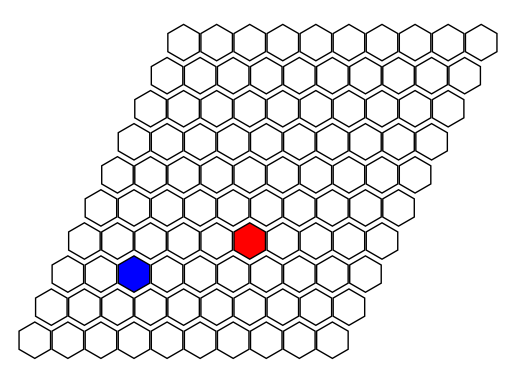

In [151]:
def drawBoard(board):
    n = board.shape[0]
    coords = [((i*2+j+1.5)/n, (j*2+1.5)/n) for i in range(n) for j in range(n)]

    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')
    colors = ['white', 'blue', 'red']

    I = 0
    for x, y in coords:
        i, j = I // n, I % n
        I += 1
        hex = RegularPolygon((x, y), numVertices=6, radius=1/n*1.1,
                            facecolor=colors[board[j, i]], edgecolor='k')
        ax.add_patch(hex)

    plt.xlim(0, 3)
    plt.ylim(0, 2 + 1.5/ n)
    plt.axis('off')
    plt.show()

board = np.zeros((10, 10), dtype=int)
board[2, 2] = 1
board[3, 5] = 2
drawBoard(board)

In [ ]:
class DisjointSet:
    # __private__
    # _protected_
    # public
    def __init__(self, n): # constructor
        self.__id__ = [-1]*n

    def find(self, a): # find with path compression
        if self.__id__[a] < 0:
            return a
        parent = self.find(self.__id__[a])
        self.__id__[a] = parent
        return parent

    def union(self, a, b):
        repA = self.find(a)
        repB = self.find(b)
        if repA == repB:
            return
        if self.__id__[repA] < self.__id__[repB]:
            self.__id__[repA] += self.__id__[repB]
            self.__id__[repB] = repA
        else:
            self.__id__[repB] += self.__id__[repA]
            self.__id__[repA] = repB

    def isSameSet(self, a, b):
        return self.find(a) == self.find(b)

    def getDot(self):
        dot = graphviz.Digraph("UFDS")
        dot.graph_attr['rankdir'] = 'BT'
        for i in range(len(self.__id__)):
            dot.node(str(i))
        for i, e in enumerate(self.__id__):
            if e < 0: continue
            dot.edge(str(i), str(e))
        return dot

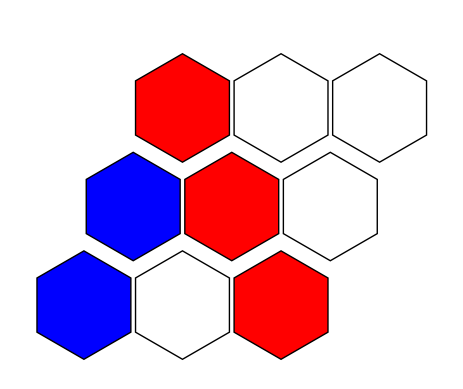

2

In [152]:
ERROR = -1
EMPTY = 0
BLACK = 1
WHITE = 2

class HexGame:
    def __init__(self, n):
        self.board = np.zeros((n, n), dtype=int)
        self.blacks = DisjointSet(n**2 + 2)
        self.whites = DisjointSet(n**2 + 2)
        for i in range(n):
            self.blacks.union(i, n**2)
            self.blacks.union(n**2 - 1 - i, n**2+1)
            self.whites.union(i * n, n**2)
            self.whites.union((i+1)*n - 1, n**2 + 1)

    def turn(self, token, pos):
        if self.board[pos] != EMPTY: return ERROR
        ds = self.blacks if token == BLACK else self.whites
        self.board[pos] = token
        i, j = pos
        n = self.board.shape[0]
        I = i*n + j
        neighbours = [(i-1,j), (i-1,j+1), (i,j-1), (i,j+1), (i+1,j-1), (i+1,j)]
        for i, j in neighbours:
            if i < 0 or i >= n or j < 0 or j >= n: continue

            if self.board[i, j] == token:
                J = i*n + j
                ds.union(I, J)

        if ds.isSameSet(n**2 ,n**2 + 1):
            drawBoard(self.board)
            return token
        else:
            return EMPTY

test = HexGame(3)
test.turn(WHITE, (1, 1))
test.turn(BLACK, (1, 0))
test.turn(WHITE, (2, 0))
test.turn(BLACK, (0, 0))
test.turn(WHITE, (0, 2))


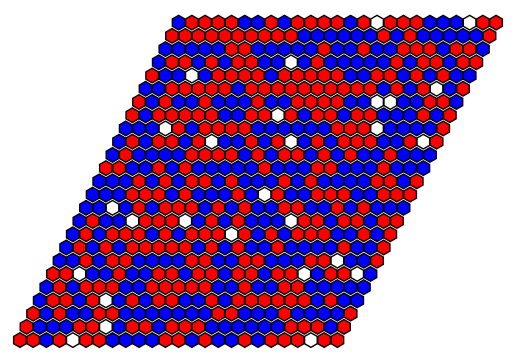

Winner Red


In [158]:
n = 25
moves = [(i, j) for i in range(n) for j in range(n)]
random.shuffle(moves)
token = cycle([BLACK, WHITE])

game = HexGame(n)
winner = EMPTY
for move in moves:
    winner = game.turn(next(token), move)
    if winner  != EMPTY:
        break

if winner != EMPTY:
    print(f"Winner {'Blue' if winner == BLACK else 'Red'}")
else:
    print("no winner :(")